# Read and preparing Data

In [ ]:
data_series = pd.read_csv("../data/interim/bicimad_time_series.csv", sep=',')

In [ ]:
data_series['unlock_date'] = pd.to_datetime(data_series['unlock_date'], format='%Y-%m-%d')

In [ ]:
data_series = data_series.set_index(data_series['unlock_date'])

# Time Series

Evaluareamos y predecidermos según cada dato de nuestro data_series, teniendo como índice la fecha de desbloqueo 'unlock_date'

# LSTM

In [30]:
import numpy as np 
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt 
from numpy import array 
from numpy import mean 
from pandas import DataFrame 
from pandas import concat 
from pandas import read_csv 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers import  Bidirectional 
import keras 
from statsmodels.tools.eval_measures import rmse 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
import warnings; 
warnings.simplefilter('ignore') 

* Trip_minutes

In [31]:
data_series_minutes = data_series['trip_minutes'] 
data_series_minutes = data_series_minutes.to_frame() 
data_series_minutes.rename(columns={'trip_minutes':'Real'},inplace = True)   
data_minutes_mean = data_series_minutes.groupby(data_series_minutes.index).mean()
values = data_minutes_mean.values 

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled = scaler.fit_transform(values)  

n_features = 1
n_train_days = len(values)-31 
n_days = n_train_days // n_features
train = values[:n_train_days, :] 
test = values[n_train_days:, :]  
n_obs = n_days * n_features 
X_train, y_train = train[:, :n_obs], train[:, -n_features] 
X_test, y_test = test[:, :n_obs], test[:, -n_features] 

print(X_train.shape, len(X_train), y_train.shape)  

X_train = X_train.reshape((X_train.shape[0], n_days, n_features)) 
X_test = X_test.reshape((X_test.shape[0], n_days, n_features))  

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

(334, 1) 334 (334,)


ValueError: cannot reshape array of size 334 into shape (334,334,1)

In [33]:
# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(values).reshape(-1, 1))

# Crear los conjuntos de entrenamiento y prueba
train_data = scaled_data[:-30]
test_data = scaled_data[-30:]

# Crear las secuencias de entrada y salida
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 30
X, y = create_sequences(train_data, seq_length)

# Crear y entrenar el modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X, y, epochs=200, verbose=0)

# Hacer predicciones
inputs = test_data[-seq_length:]
inputs = inputs.reshape((1, seq_length, 1))
predictions = model.predict(inputs)

# Desnormalizar las predicciones
predictions = scaler.inverse_transform(predictions)


1/1 [==============================] - 0s 138ms/step


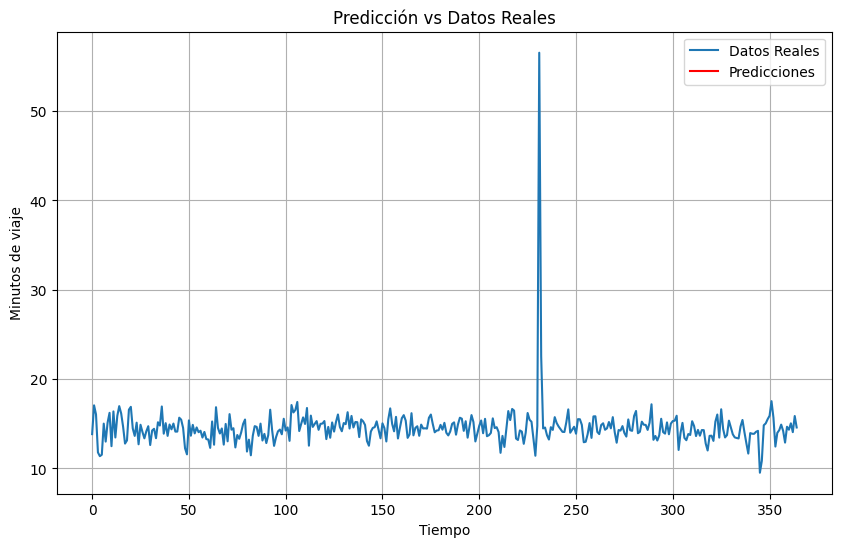

In [34]:
# Graficamos el resultado
plt.figure(figsize=(10,6))
plt.plot(values, label="Datos Reales")
plt.plot(predictions, label="Predicciones", color='r')
plt.title("Predicción vs Datos Reales")
plt.xlabel("Tiempo")
plt.ylabel("Minutos de viaje")
plt.legend()
plt.grid(True)
plt.show()


# ARIMA

In [21]:
import numpy as np
np.random.seed(42) 
import pandas as pd 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pmdarima import auto_arima                         
from statsmodels.tools.eval_measures import rmse 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
import warnings   
warnings.filterwarnings("ignore") 

* Trip_minutes

In [22]:
data_series_minutes = data_series['trip_minutes'] 
data_series_minutes = data_series_minutes.to_frame() 
data_series_minutes.rename(columns={'trip_minutes':'Real'},inplace = True)   
data_minutes_mean = data_series_minutes.groupby(data_series_minutes.index).mean()
values = data_minutes_mean.values 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41414D+00    |proj g|=  1.51907D-01

At iterate    5    f=  2.38212D+00    |proj g|=  2.22862D-02

At iterate   10    f=  2.36436D+00    |proj g|=  6.86718D-03

At iterate   15    f=  2.36149D+00    |proj g|=  3.43381D-03


 This problem is unconstrained.



At iterate   20    f=  2.36122D+00    |proj g|=  1.57183D-03

At iterate   25    f=  2.36121D+00    |proj g|=  1.85174D-04

At iterate   30    f=  2.36085D+00    |proj g|=  3.36381D-03

At iterate   35    f=  2.36033D+00    |proj g|=  4.40587D-03

At iterate   40    f=  2.36017D+00    |proj g|=  2.50261D-03

At iterate   45    f=  2.36013D+00    |proj g|=  9.38493D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     67      1     0     0   9.386D-04   2.360D+00
  F =   2.3601300271604972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


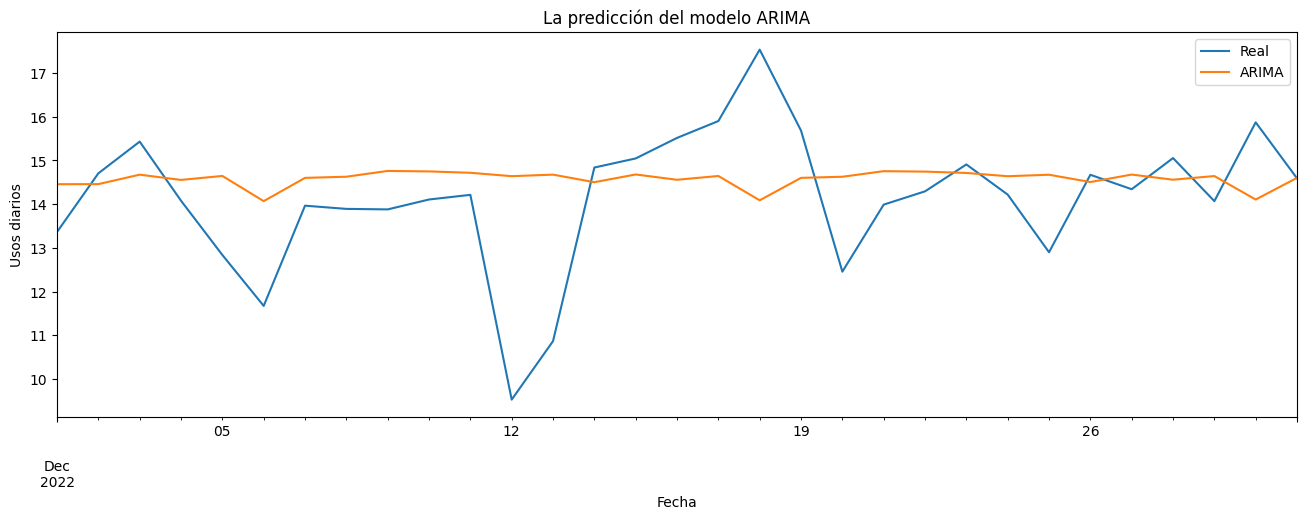

In [27]:
auto_arima(values, seasonal=True, m=12).summary()  
train_data = data_minutes_mean[:len(data_minutes_mean)-31] 
test_data = data_minutes_mean[len(data_minutes_mean)-31:] 

arima_model = SARIMAX(train_data['Real'], order = (1,1,1), seasonal_order = (1,0,1,12))  

arima_result = arima_model.fit() 
arima_result.summary()  
arima_pred = arima_result.predict(start = len(train_data), end = len(data_minutes_mean)-1, typ="levels").rename("ARIMA")
#arima_pred = arima_pred.to_frame()   
test_data = pd.concat([test_data, arima_pred],axis=1)   
test_data['Real'].plot(figsize = (16,5), legend=True) 
arima_pred.plot(legend = True);   
plt.title('La predicción del modelo ARIMA') 
plt.xlabel('Fecha') 
plt.ylabel('Usos diarios') 
plt.show()

In [28]:
rmse_arima = round(rmse(test_data['Real'], test_data['ARIMA']),2) 
mse_arima = round((rmse_arima**2),2) 
mae_arima = round(mean_absolute_error(test_data['Real'], test_data['ARIMA']),2)  

r2_arima = round(r2_score(test_data['Real'], test_data['ARIMA']),3) 

In [29]:
def mean_absolute_percentage_error(y_true, y_pred):      
    y_true, y_pred = np.array(y_true), np.array(y_pred)     
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
mape = round(mean_absolute_percentage_error(y_true=test_data['Real'],                    
            y_pred=test_data['ARIMA']),2) 
n_features = 1 
n = len(test_data['Real']) 
p = n_features 
adjusted_R2_arima = round(1-((1-r2_arima)*(n-1))/(n-p-1),3)

print(f'MSE: {mse_arima}\nRMSE: {rmse_arima}\nMAE: {mae_arima}\nMAPE: {mape}%\nR^2: {r2_arima}\nAdjusted R^2: {adjusted_R2_arima}') 

MSE: 2.66
RMSE: 1.63
MAE: 1.15
MAPE: 8.94%
R^2: -0.145
Adjusted R^2: -0.184


* Distance

* idBikes

* idDrivers